In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.svm import SVC

data = load_iris()


In [4]:
data.data
type(data.data)
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)




In [6]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

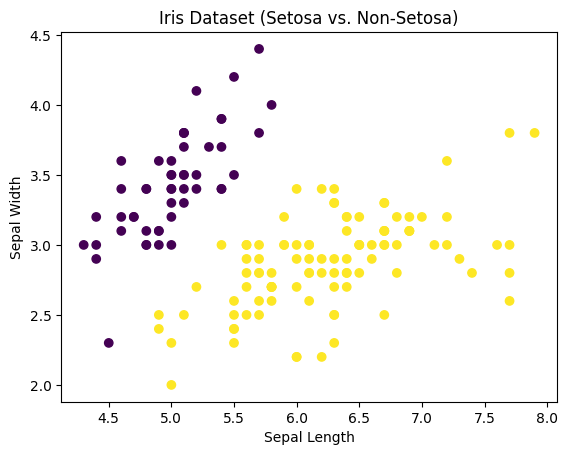

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

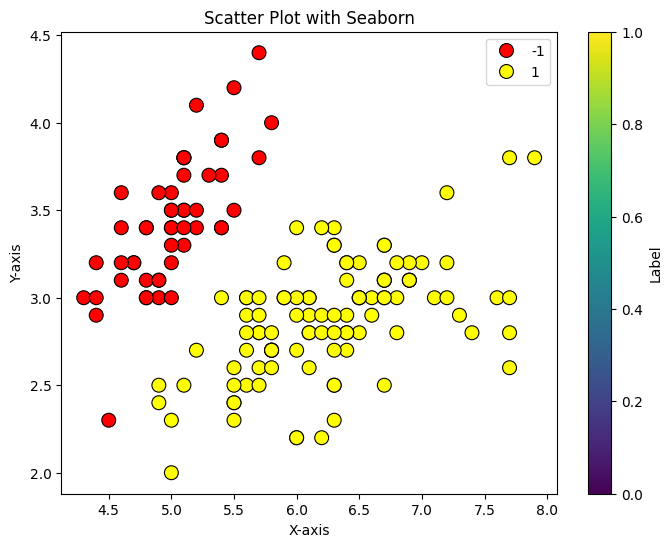

In [12]:
import seaborn as sns
# Sample data

# Create scatter plot with seaborn
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='autumn', s=100, edgecolor='k')

# Customize the plot
scatter_plot.set_xlabel('X-axis')
scatter_plot.set_ylabel('Y-axis')
scatter_plot.set_title('Scatter Plot with Seaborn')
plt.colorbar(scatter_plot.collections[0], label='Label')
plt.show()


In [21]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [17]:
d = ['Unhellig', 'kot', 'CJ', 'Schiller']
for i, x in enumerate(d):
    print(i,x)
couple = ('Ivar', 'Magnus', 'Lene')

i,j,k = couple
print(i,j)

0 Unhellig
1 kot
2 CJ
3 Schiller
Ivar Magnus


(50, 50)


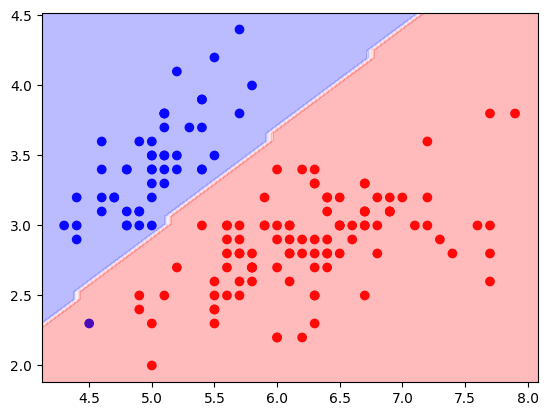

In [22]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)
    print(Z.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, svm)

In [23]:
new_samples = np.array([[0, 0], [4, 4]])
predictions = svm.predict(new_samples)
print(predictions)

[-1. -1.]


In [ ]:

=
clf = SVC(kernel='linear')
clf.fit(X, y)

print(clf.predict(new_samples))